In [2]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [3]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Loading Training Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

print("Successfully loaded Training Data...")

Successfully loaded Training Data...


In [4]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Training
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

### maybe we need to train with Total Acceleration, from paper....
X_train_total_acceleration = []
for i in range(len(X_train)):
    temp = []
    for j in range(len(X_train[0])):
        temp.append(np.dot(X_train[i][j],np.transpose(X_train[i][j])))
    X_train_total_acceleration.append(temp)

X_train_total_acceleration = np.array(X_train_total_acceleration)

Recognizer = tree.DecisionTreeClassifier()
Recognizer = Recognizer.fit(X_train_total_acceleration, y_train)
print("Descision Tree Trained Successfully!")

Descision Tree Trained Successfully!


Successfully loaded Test Data...
Accuracy of the Decision Tree model is (max_depth == None):  0.4722222222222222
Displaying Confusion Matrix...


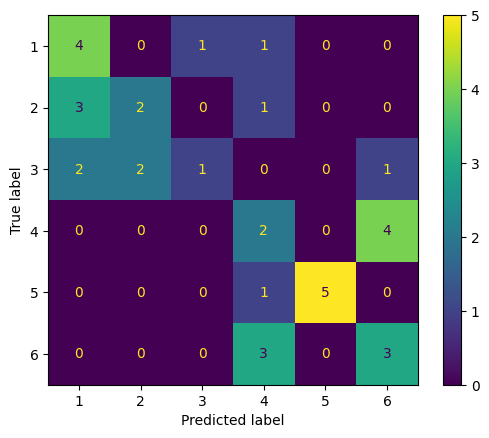

In [5]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Testing
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

print("Successfully loaded Test Data...")

X_test_total_acceleration = []
for i in range(len(X_test)):
    temp = []
    for j in range(len(X_test[0])):
        temp.append(np.dot(X_test[i][j],np.transpose(X_test[i][j])))
    X_test_total_acceleration.append(temp)

X_test_total_acceleration = np.array(X_test_total_acceleration)

y_pred = Recognizer.predict(X_test_total_acceleration)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of the Decision Tree model is (max_depth == None): ",accuracy)
con_mat = confusion_matrix(y_test,y_pred, labels=Recognizer.classes_)
print("Displaying Confusion Matrix...")
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=Recognizer.classes_)
disp.plot()
plt.show()

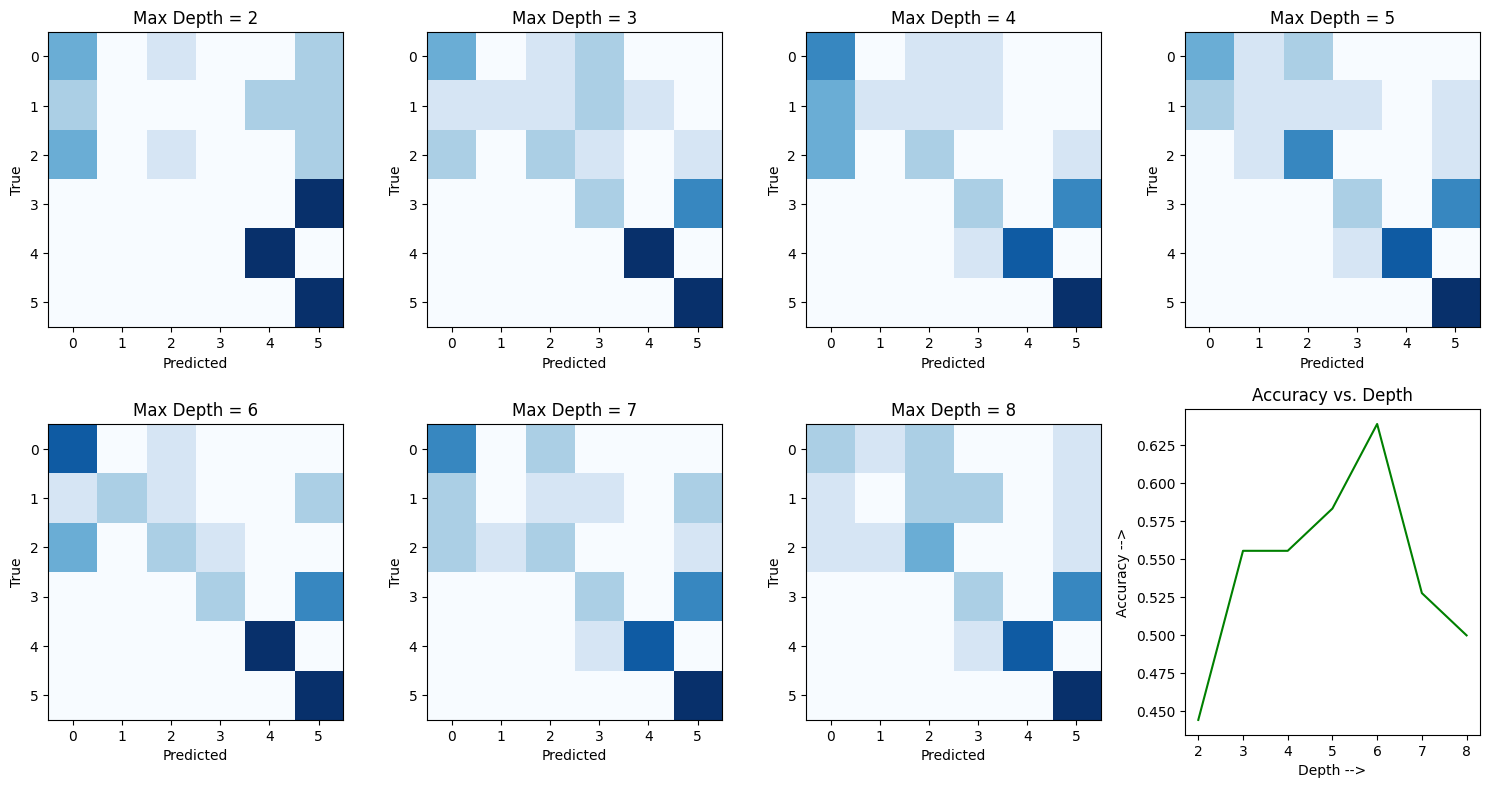

In [6]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Tuning
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

acc_vals = []
con_mats = []
depths = [i for i in range(2,9)]
for depth in depths:
    Recognizer = tree.DecisionTreeClassifier(max_depth=depth)
    Recognizer = Recognizer.fit(X_train_total_acceleration, y_train)
    y_pred = Recognizer.predict(X_test_total_acceleration)
    acc_vals.append(accuracy_score(y_test,y_pred))
    con_mats.append(confusion_matrix(y_test,y_pred, labels=Recognizer.classes_))

### Plotting the data
num_plots = len(depths)

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Plot confusion matrices
for i in range(num_plots):
    axs[i//4, i%4].imshow(con_mats[i], cmap='Blues', interpolation='nearest')
    axs[i//4, i%4].set_title(f"Max Depth = {depths[i]}")
    axs[i//4, i%4].set_xlabel('Predicted')
    axs[i//4, i%4].set_ylabel('True')

# Plot accuracy values
axs[1, 3].plot(depths, acc_vals, color='green')
axs[1, 3].set_title('Accuracy vs. Depth')
axs[1, 3].set_xlabel('Depth -->')
axs[1, 3].set_ylabel('Accuracy -->')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()